In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:


# Load the dataset from the CSV file
df = pd.read_csv('co2_emission_preprocessed.csv')  # Replace 'your_dataset.csv' with the path to your CSV file




## TIme- Series Analysis of co2 emisson of 10 coutries with hightes and lowest CO2 per capita

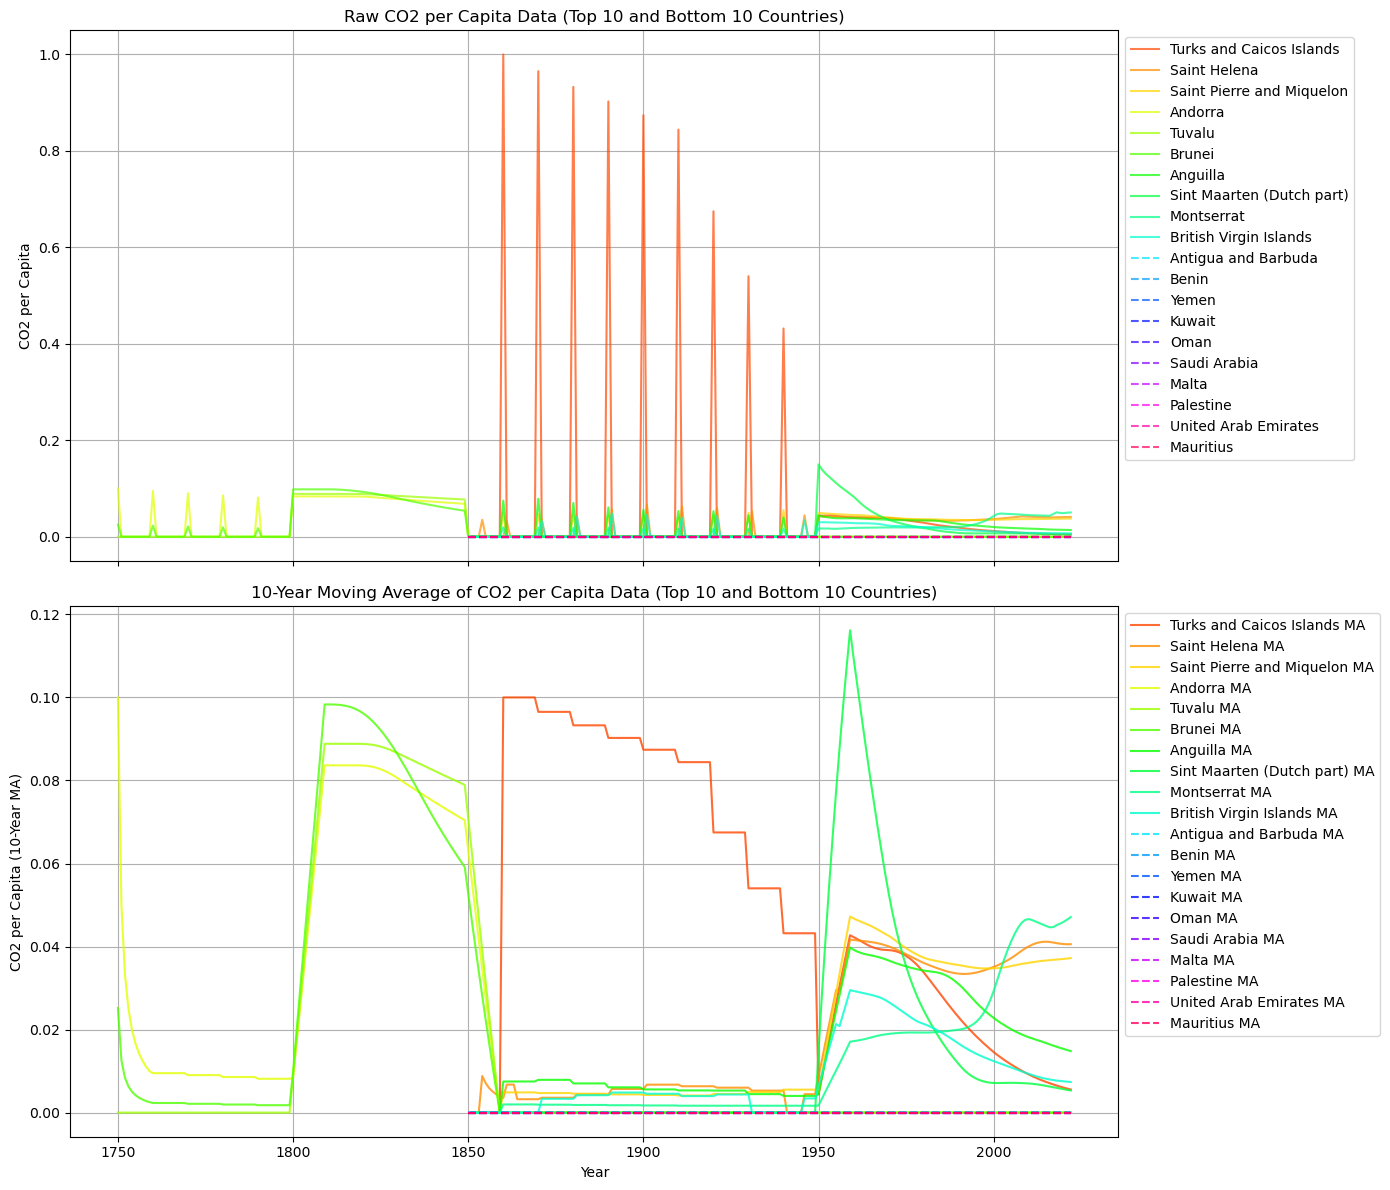

In [10]:
# Ensure data is sorted by Year for each country
df = df.sort_values(by=['Country', 'Year'])

# Calculate average CO2 per capita for each country over all years
average_co2_per_capita = df.groupby('Country')['CO2_per_capita'].mean()

# Get top 10 and bottom 10 countries based on average CO2 per capita
top_10_countries = average_co2_per_capita.nlargest(10).index
bottom_10_countries = average_co2_per_capita.nsmallest(10).index

# Filter the main DataFrame for only top 10 and bottom 10 countries and make a copy to avoid warnings
filtered_df = df[df['Country'].isin(top_10_countries.union(bottom_10_countries))].copy()

# Moving average window size
window_size = 10  # for a 10-year moving average

# Calculate the moving average for CO2_per_capita within the filtered DataFrame
filtered_df.loc[:, 'CO2_per_capita_MA'] = filtered_df.groupby('Country')['CO2_per_capita'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Set up color palette with distinct colors
colors = sns.color_palette("hsv", len(top_10_countries) + len(bottom_10_countries))

# Set up the subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot 1: Raw CO2 per capita data for top 10 and bottom 10 countries
for i, country in enumerate(top_10_countries):
    country_df = filtered_df[filtered_df['Country'] == country]
    axes[0].plot(country_df['Year'], country_df['CO2_per_capita'], label=country, color=colors[i], linestyle='-', alpha=0.7)

for i, country in enumerate(bottom_10_countries):
    country_df = filtered_df[filtered_df['Country'] == country]
    axes[0].plot(country_df['Year'], country_df['CO2_per_capita'], label=country, color=colors[len(top_10_countries) + i], linestyle='--', alpha=0.7)

axes[0].set_title('Raw CO2 per Capita Data (Top 10 and Bottom 10 Countries)')
axes[0].set_ylabel('CO2 per Capita')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
axes[0].grid(True)

# Plot 2: 10-year Moving Average for top 10 and bottom 10 countries
for i, country in enumerate(top_10_countries):
    country_df = filtered_df[filtered_df['Country'] == country]
    axes[1].plot(country_df['Year'], country_df['CO2_per_capita_MA'], label=f'{country} MA', color=colors[i], linestyle='-', alpha=0.8)

for i, country in enumerate(bottom_10_countries):
    country_df = filtered_df[filtered_df['Country'] == country]
    axes[1].plot(country_df['Year'], country_df['CO2_per_capita_MA'], label=f'{country} MA', color=colors[len(top_10_countries) + i], linestyle='--', alpha=0.8)

axes[1].set_title(f'{window_size}-Year Moving Average of CO2 per Capita Data (Top 10 and Bottom 10 Countries)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('CO2 per Capita (10-Year MA)')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()